<a href="https://colab.research.google.com/github/YashasviChhaliya/Emotion-Recognition-from-Speech_CodeAlpha/blob/main/Emotion_Recognition_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

In [ ]:
!pip install librosa numpy pandas scikit-learn tensorflow keras soundfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/SAVEE/"  # Change this to your actual path
files = os.listdir(dataset_path)
print(f"Total audio files: {len(files)}")
print(files[:10])  # Show first 10 files

Total audio files: 480
['JK_h06.wav', 'DC_a01.wav', 'DC_a02.wav', 'DC_a05.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_d05.wav', 'DC_a08.wav', 'DC_a10.wav', 'DC_f09.wav']


In [ ]:
!pip install librosa numpy pandas scikit-learn soundfile

In [ ]:
import librosa
import numpy as np

# Function to extract features from an audio file
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)  # Load audio file

    # Extract features
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate).T, axis=0)

    return np.hstack([mfccs, chroma, mel])  # Concatenate features

In [ ]:
import pandas as pd

# Define emotion labels based on SAVEE naming conventions
emotion_map = {
    '_a': 'angry', '_d': 'disgust', '_f': 'fearful', '_h': 'happy',
    '_s': 'sad', '_n': 'neutral', '_su': 'surprised'
}

features, labels = [], []

# Loop through dataset files
for file in os.listdir(dataset_path):
    if file.endswith(".wav"):
        # Get the emotion from the filename
        for key in emotion_map.keys():
            if key in file:
                emotion_label = emotion_map[key]
                break

        file_path = os.path.join(dataset_path, file)
        features.append(extract_features(file_path))
        labels.append(emotion_label)

# Convert to DataFrame
df = pd.DataFrame(features)
df['emotion'] = labels

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,emotion
0,-293.822083,117.203323,10.013577,23.099888,24.972099,-5.399222,-10.284087,-0.410089,1.644118,-7.517803,...,9.684562e-06,6.688063e-06,4.184347e-06,2.858268e-06,2.896003e-06,2.379741e-06,1.665068e-06,1.465400e-06,1.516195e-06,happy
1,-355.138336,118.953339,22.069256,25.513767,27.045473,11.818258,0.723776,-15.634458,-7.740739,5.602004,...,2.315422e-07,2.110375e-07,2.030916e-07,1.958710e-07,1.912423e-07,1.885348e-07,1.837423e-07,1.811077e-07,1.793060e-07,angry
2,-328.385803,128.776535,15.799766,6.266606,20.192532,13.374539,1.084154,-12.195089,-3.099169,10.634800,...,2.995143e-07,2.075470e-07,1.795765e-07,1.863623e-07,1.769748e-07,1.738241e-07,1.622259e-07,1.588742e-07,1.619196e-07,angry
3,-329.917480,105.769348,13.415139,14.107105,20.732052,11.325972,0.878276,-15.767823,-8.964829,3.930927,...,7.862755e-07,4.399567e-07,3.784935e-07,3.276158e-07,2.370817e-07,1.922323e-07,1.823721e-07,1.471082e-07,1.375736e-07,angry
4,-370.804382,111.561279,15.388374,19.285555,23.032221,9.888403,0.282011,-10.335348,0.816975,8.553163,...,4.414215e-07,3.959201e-07,3.622993e-07,3.369157e-07,3.199478e-07,3.093826e-07,3.092650e-07,3.108676e-07,3.028837e-07,angry


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode emotion labels into numbers
encoder = LabelEncoder()
df['emotion'] = encoder.fit_transform(df['emotion'])

# Split dataset into training and testing (80% Train, 20% Test)
X = df.iloc[:, :-1].values
y = df['emotion'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset Split Successfully!")

Dataset Split Successfully!


In [ ]:
!pip install tensorflow keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Output Layer (Softmax for multi-class classification)
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          46,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,878 (343.27 KB)

 Trainable params: 87,878 (343.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1750 - loss: 31.2375 - val_accuracy: 0.3229 - val_loss: 6.7205
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2008 - loss: 11.7332 - val_accuracy: 0.4271 - val_loss: 4.9988
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1988 - loss: 8.7789 - val_accuracy: 0.3125 - val_loss: 3.2060
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2660 - loss: 6.3011 - val_accuracy: 0.3438 - val_loss: 2.6856
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2512 - loss: 4.9967 - val_accuracy: 0.2604 - val_loss: 2.3046
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3115 - loss: 4.0443 - val_accuracy: 0.4479 - val_loss: 1.9750
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3225 - loss: 3.2136 - val_accuracy: 0.3854 - val_loss: 2.0267
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2944 - loss: 3.1504 - val_accuracy: 0.4167 - val_l

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4987 - loss: 1.5546 
Test Accuracy: 52.08%


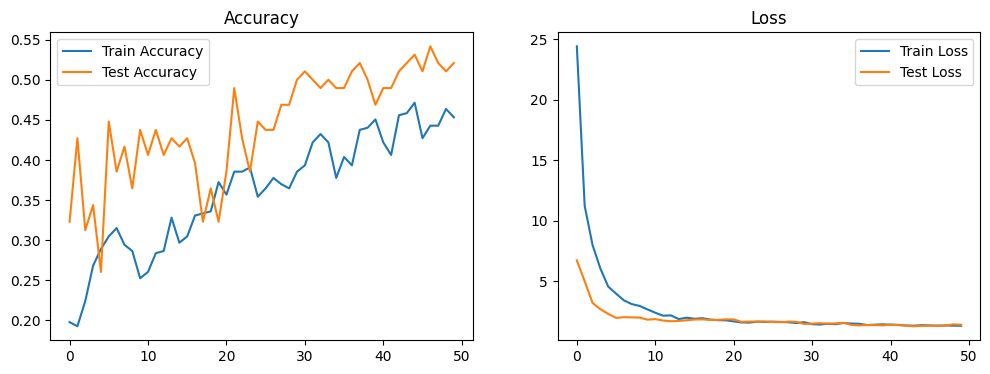

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
model.save("/content/drive/MyDrive/emotion_model.keras")
print("Model Saved Successfully!")

Model Saved Successfully!


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/emotion_model.keras")
print("Model Loaded Successfully!")

Model Loaded Successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
!pip install flask flask-ngrok librosa numpy soundfile

In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import os

app = Flask(__name__)

# Load the trained model
model = load_model("/content/drive/MyDrive/emotion_model.keras")  # Use the saved model path

# Define emotion labels (same as used during training)
emotions = ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
encoder = LabelEncoder()
encoder.fit(emotions)

# Function to extract features from audio
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate).T, axis=0)
    return np.hstack([mfccs, chroma, mel])  # Combine features

# API Route for Emotion Prediction
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400

    file = request.files['file']
    file_path = "temp_audio.wav"
    file.save(file_path)

    # Extract features and make prediction
    features = extract_features(file_path).reshape(1, -1)
    predicted_class = model.predict(features)
    emotion = encoder.inverse_transform([np.argmax(predicted_class)])

    return jsonify({'emotion': emotion[0]})

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)

Writing app.py


In [ ]:
!pip install flask-ngrok

In [ ]:
!ngrok authtoken 2trF5nb8ZbOiC95UDy9b4uKfpwx_76VPT9Z8ktrAna5tEs95y

In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Enables ngrok for Colab

# Load the trained model
model = load_model("/content/drive/MyDrive/emotion_model.keras")

# Define emotion labels
emotions = ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
encoder = LabelEncoder()
encoder.fit(emotions)

# Function to extract features from an audio file
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate).T, axis=0)
    return np.hstack([mfccs, chroma, mel])  # Combine features

# API Route for emotion prediction
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400

    file = request.files['file']
    file_path = "temp_audio.wav"
    file.save(file_path)

    # Extract features and make prediction
    features = extract_features(file_path).reshape(1, -1)
    predicted_class = model.predict(features)
    emotion = encoder.inverse_transform([np.argmax(predicted_class)])

    return jsonify({'emotion': emotion[0]})

# Run Flask with ngrok
if __name__ == '__main__':
    app.run()

Overwriting app.py


In [ ]:
!python app.py

2025-03-04 15:34:55.569663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-04 15:34:55.618590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-04 15:34:55.634162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-04 15:34:57.696309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variab